In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Linear Regression with Polynomial Curve Fitting	


In [2]:
#data loading

df = pd.read_csv('globalTemp.csv')
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()

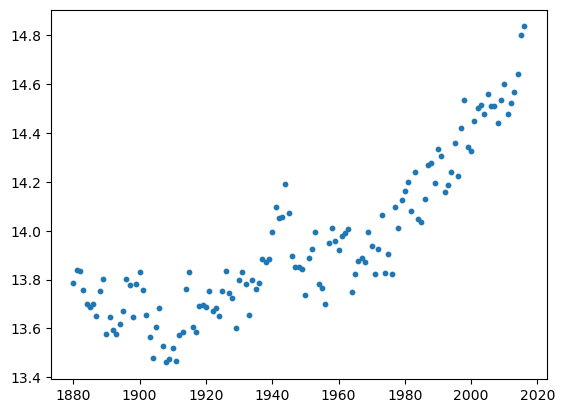

In [3]:
plt.scatter(x, y, s = 10)

In [4]:
# 用二阶多项式去拟合

order = 2 #多项式的阶数
X = np.array([x**i for i in range(order+1)]).T

In [5]:
print(X[0])
print(X.shape)

[      1    1880 3534400]
(137, 3)


Task: implement yourself linear regression using numpy

In [6]:
# W =
W = np.linalg.solve(X.T @ X, X.T @ y) 
y_hat = X @ W


Task: implement linear regression using the functions from sklearn

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [7]:
# W2 = 
modal = LinearRegression(fit_intercept=False,copy_X=True,n_jobs=None,positive=False)
modal.fit(X,y)
W_2 = modal.coef_
y_hat2 = modal.predict(X)

verify your answer with codes below

In [8]:
print("our weight = ", W)
print("sklearn weight = ", W_2)

our weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]
sklearn weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]


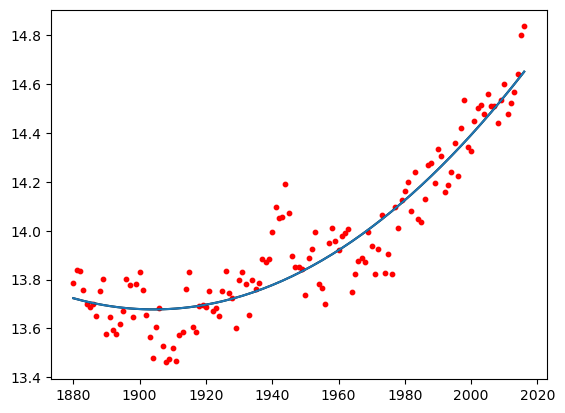

In [9]:
plt.scatter(x, y, s=10, c="r")
plt.plot(x, y_hat,c="k")
plt.plot(x, y_hat2)

## Linear Regression

In [10]:
N_SAMPLES = 500
N_FEATURES = 200
NOISE = 3
data = datasets.make_regression(n_samples=N_SAMPLES, 
                                n_features=N_FEATURES, 
                                n_informative=5, 
                                noise=NOISE, 
                                random_state=9961)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9961)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 200) (350,)
(150, 200) (150,)


Task: use numpy to implement linear regression via the normal equation, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [31]:

W = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
L2 = np.linalg.norm(W,ord=2)
L1 = np.linalg.norm(W,ord=1)
print(f"L2 = {L2} , L1 = {L1}\n")

y_train_pre = X_train @ W
mse_train = np.sum(np.square(y_train - y_train_pre)) / np.size(y_train)
print(f"mse_train = {mse_train}\n")

y_pre = X_test @ W
mse_test = np.sum(np.square(y_test - y_pre)) / np.size(y_test)
print(f"mse_test = {mse_test}")

L2 = 128.1182134772978 , L1 = 286.7609971067611

mse_train = 4.12223778334436

mse_test = 19.846467666019187


Task: use scikit-learn’s LinearRegression to fit the same model without an intercept, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [30]:
modal = LinearRegression(fit_intercept=False ,copy_X=True ,n_jobs=None ,positive=False)
modal.fit(X_train,y_train)
W_2 = modal.coef_
L2_test = np.linalg.norm(W_2,ord=2)
L1_test = np.linalg.norm(W_2,ord=1)
print(f"L2 = {L2} , L1 = {L1}\n")

from sklearn.metrics import mean_squared_error

y_train_pre = X_train @ W_2
mse_train = np.sum(np.square(y_train - y_train_pre)) / np.size(y_train)
print(f"mse_train = {mse_train}\n")

y_pre2 = modal.predict(X_test)
mse_test = mean_squared_error(y_test , y_pre2)
print(f"mse_test = {mse_test}")


L2 = 128.1182134772978 , L1 = 286.7609971067611

mse_train = 4.1222377833443575

mse_test = 19.84646766601925


## Ridge Regression

Task: use numpy to implement ridge regression with various values of regularization strength via the closed-form solution, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [28]:
def find_W(X_train,y_train,alpha):

    I = np.eye(np.shape(X_train)[1])
    A_ridge = X_train.T @ X_train
    B_ridge = np.linalg.inv(A_ridge + alpha * I)
    W_ridge = B_ridge @ X_train.T @ y_train

    return W_ridge

def find_a (X_train,y_train,alphas,k=5):

    num_train = X_train.shape[0]
    fold = num_train // k
    mse_train = {alpha:[] for alpha in alphas}

    for i in range(k):
        val_begin = i * fold
        val_end = (i+1) * fold
        val_idx = np.arange(val_begin,val_end)
        tr_idx = np.concatenate( [ np.arange(0,val_begin),np.arange(val_end,num_train) ] )

        X_tr ,y_tr = X_train[tr_idx] ,y_train[tr_idx]
        X_val ,y_val = X_train[val_idx] ,y_train[val_idx]

        for alpha in alphas:

            W_tr = find_W(X_tr,y_tr,alpha)
            y_pre = X_val @ W_tr
            mse = np.sum(np.square(y_val - y_pre)) / np.size(y_val)

            mse_train[alpha].append(mse)

    mse_ridge = {
        alpha : np.mean(mses)
        for alpha,mses in mse_train.items()
    }

    best_alpha = min(mse_ridge,key=mse_ridge.get)
    return best_alpha

alphas = [0.01,0.1,1,10,100]

alpha = find_a(X_train,y_train,alphas,k=5)
print(f"alpha = {alpha}\n")

W_ridge = find_W (X_train,y_train,alpha)
L2_ridge = np.linalg.norm(W_ridge,ord=2)
print(f"L2 = {L2_ridge}\n")

y_train_pre = X_train @ W_ridge
mse_train = np.sum(np.square(y_train - y_train_pre)) / np.size(y_train)
print(f"mse_train = {mse_train}\n")

y_pre = X_test @ W_ridge
mse_test = np.sum(np.square(y_test - y_pre)) / np.size(y_test)
print(f"mse_test = {mse_test}")




alpha = 0.1

L2 = 128.03563490442258

mse_train = 4.125257423066403

mse_test = 19.649079888630606


Task: use scikit-learn’s Ridge to fit a ridge-regression model with various values of $\lambda$ and no intercept, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [27]:
from sklearn.linear_model import RidgeCV
alphas2 = [0.01,0.1,1,10,100]

ridge_cv = RidgeCV(alphas=alphas2 ,fit_intercept=False ,cv=5)
ridge_cv.fit(X_train,y_train)

a2 = ridge_cv.alpha_
W_ridge2 = ridge_cv.coef_

print(f"alpha = {a2}\n")

L2_ridge2 = np.linalg.norm(W_ridge2,ord=2)
print(f"L2 = {L2_ridge2}\n")

y_train_pre = X_train @ W_ridge2
mse_train = np.sum(np.square(y_train - y_train_pre)) / np.size(y_train)
print(f"mse_train = {mse_train}\n")

y_pre_ridge2 = ridge_cv.predict(X_test)
mse_ridge2 = mean_squared_error(y_test,y_pre_ridge2)
print(f"mse_test = {mse_ridge2}")

alpha = 0.1

L2 = 128.03563490442258

mse_train = 4.125257423066396

mse_test = 19.649079888630997


## Lasso

Task: use scikit-learn’s Lasso to fit a Lasso-regression model with various values of $\lambda$ and no intercept, compute the L1 norm of the learned weights, report the mean squared error on both training and test data, and count the number of non-zero weights.

In [35]:
from sklearn.linear_model import LassoCV

alphas = [0.01,0.1,1,10,100]

Lasso = LassoCV(alphas=alphas ,fit_intercept=False ,copy_X=True)
Lasso.fit(X_train,y_train)

W_lasso = Lasso.coef_
L1_lasso = np.linalg.norm(W_lasso ,ord=1)
print(f"L1 = {L1_lasso}\n")

y_train_pre = X_train @ W_lasso
mse_train = np.sum(np.square(y_train - y_train_pre)) / np.size(y_train)
print(f"mse_train = {mse_train}\n")

y_pre_lasso = Lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test ,y_pre_lasso)
print(f"mse = {mse_lasso}\n")

count = np.count_nonzero(W_lasso)
print(f"The number of non_zero weights = {count}")


L1 = 254.52444746082554

mse_train = 6.258997200436201

mse = 9.671303983734893

The number of non_zero weights = 88
